# P03 - Life Expectancy

## Objetivos

### Generales
Fin último del estudio. Se formula atendiendo el propósito global del trabajo. No presenta detalles.
Se orienta a la totalidad del trabajo. Tiene que ver con el título del trabajo.

### Específicos
De forma detallada describen cada uno de los componentes del trabajo.
En conjunto garantizan la consecución del objetivo general.

## Marco Teórico 
### Métodos Basados en Árboles y Ensambles de Modelos

---

### 1. Regresión lineal  
La regresión lineal es un método estadístico que modela la relación entre una variable respuesta \( y \) y uno o más predictores \( X \).  
Busca ajustar una recta o hiperplano que minimice el error cuadrático:

\[
\hat{y} = \beta_0 + \beta_1 x_1 + \dots + \beta_p x_p
\]

Es útil por su interpretabilidad, pero tiene limitaciones importantes que dan lugar a otros modelos más flexibles, como los árboles de decisión.

---

### 2. Seis problemas potenciales en una regresión (ISLP)  
En la práctica, una regresión lineal puede fallar por:

#### **1. No linealidad**
La relación entre \( X \) y \( y \) no es lineal.  
Solución: transformar variables o usar modelos no lineales como árboles.

#### **2. Correlación de errores**
Los errores no son independientes (patrones temporales).  
Solución: modelos de series de tiempo o correcciones de autocorrelación.

#### **3. Varianza no constante (heterocedasticidad)**
Los errores aumentan o disminuyen con el nivel de \( X \).  
Solución: transformaciones o modelos robustos.

#### **4. Outliers**
Observaciones extremas que distorsionan la regresión.

#### **5. Puntos de palanca (high leverage)**
Observaciones que influyen mucho por tener valores extremos de \( X \).

#### **6. Colinealidad**
Variables extremadamente correlacionadas entre sí → inestabilidad en coeficientes.  
Solución: regularización (Ridge, Lasso) o modelos basados en árboles.

Estos problemas motivan el uso de métodos más flexibles como los árboles y los ensambles.

---

### 3. Árbol para regresión  
Un árbol de regresión divide los datos en regiones basadas en reglas tipo:

\[
x_j < c
\]

En cada región, predice la **media** de la variable respuesta.

Características:

- Modelo no lineal
- Fácil de visualizar
- Captura interacciones automáticamente
- Poca interpretación matemática, pero muy intuitivo

Criterio común para dividir: **mínimos cuadrados (RSS)**.

---

### 4. Árbol para clasificación  
Cuando la respuesta es categórica (p.e. default sí/no), el árbol predice la clase mayoritaria en cada región.

Criterios de división:

- **Impureza Gini**
- **Entropía**
- **Error de clasificación**

Ventajas:

- Interpretables
- Manejan relaciones complejas
- No requieren escalamiento

Desventaja:  
Pueden sobreajustar fácilmente → se recomienda ajustar **pruning**.

---

### 5. Bootstrap  
El bootstrap es una técnica de remuestreo donde:

- Se generan \( B \) muestras **con reemplazo** del dataset original.
- Se entrena un modelo en cada muestra.
- Se estiman promedios, errores estándar, intervalos de confianza o ensambles.

Propósito:  
**Medir la variabilidad** de un modelo sin necesidad de más datos.

---

### 6. Ensambles de modelos  
Los ensambles combinan varios modelos para lograr mejor desempeño.  
Idea principal: **muchos modelos débiles pueden formar un modelo fuerte**.

Tipos principales:

- Bagging
- Random Forest
- Boosting
- XGBoost / LightGBM / CatBoost

Beneficios:

- Reducen varianza y overfitting
- Mayor estabilidad
- Mayor precisión

---

### 7. Bagging (Bootstrap Aggregating)  
El bagging:

1. Genera muchas muestras bootstrap.
2. Entrena un modelo (generalmente un árbol) en cada una.
3. Promedia predicciones (regresión) o usa votación (clasificación).

Su mayor beneficio:  
**Reduce la varianza del modelo base**, especialmente útil para árboles no podados.

El bagging con árboles es el paso previo a **Random Forests**.

---

### 8. Boosting  
Boosting construye varios modelos secuenciales, donde cada modelo intenta corregir los errores del anterior.

Características:

- Modelos débiles → fuertes
- Alta precisión
- Controla el sesgo progresivamente
- Riesgo de sobreajuste si no se regula

Ejemplos: AdaBoost, Gradient Boosting, XGBoost.

---

### 9. Tema elegido para proyecto  

En este proyecto analizaremos el dataset global de indicadores de salud, el cual contiene información por país y año sobre variables demográficas, socioeconómicas y sanitarias, incluyendo **Life expectancy**, **Adult Mortality**, **GDP**, **HIV/AIDS**, **Income composition of resources**, entre otras.

El objetivo principal del proyecto será:

**"Predecir la esperanza de vida (Life expectancy) utilizando métodos basados en árboles de decisión y ensambles (Bagging y Boosting), evaluando su desempeño y comparándolos con modelos más simples."**

---

#### Justificación del tema

La esperanza de vida es un indicador clave del desarrollo humano y está influenciada por muchos factores que interactúan entre sí de forma **no lineal**. Por ello:

- Los **árboles de decisión** permiten capturar relaciones complejas sin suponer linealidad.
- Los ensambles como **Bagging** reducen la varianza y mejoran estabilidad.
- Métodos como **Boosting** permiten capturar patrones débiles acumulativamente para mejorar la predicción.

---



## Análisis del Dataset

¿De dónde viene?
¿Qué contiene?
¿Qué información dan las muestras?
¿Qué se quiere analizar?
¿Qué resultado se podría encontrar al ajustar un modelo?

---
## Modelos propuestos (Regresión)

El objetivo del proyecto es construir modelos capaces de predecir la variable **Life expectancy** utilizando únicamente métodos de **regresión** basados en árboles y ensambles.

Se trabajará con tres componentes principales:
1. **Random Forest (regresión)**
2. **XGBoost Regressor**
3. **Pipeline con optimización de hiperparámetros y validación cruzada**

Además, todos los modelos se evaluarán con **k-fold cross-validation** y se reportarán la **media y desviación estándar** de las métricas.

---

### Random Forest Regressor

Un **Random Forest** para regresión combina muchos árboles entrenados con:
- Bootstrap con reemplazo
- Selección aleatoria de variables en cada división

Esto reduce la varianza y mejora la estabilidad del modelo frente a ruido.

**Hiperparámetros clave a optimizar:**
- `n_estimators` (número de árboles)
- `max_depth`
- `min_samples_split`
- `min_samples_leaf`
- `max_features`
- `bootstrap` (si usar o no bootstrap)

Se usará un `random_state` fijo para asegurar resultados consistentes.

---

### XGBoost Regressor

XGBoost es un modelo de boosting que construye árboles secuenciales en donde cada nuevo árbol corrige los errores del modelo anterior.

Ventajas:
- Muy potente para relaciones no lineales
- Incluye regularización
- Control fino de complejidad del modelo

**Hiperparámetros clave a optimizar:**
- `n_estimators`
- `learning_rate`
- `max_depth`
- `subsample`
- `colsample_bytree`
- `gamma`
- `reg_lambda`, `reg_alpha` (regularización)

También se define un `random_state` fijo para reproducibilidad.

---

### Evaluación de modelos  
Con **k-fold cross-validation**, se reportarán:

- **RMSE (Root Mean Squared Error)** -> error promedio penalizando más los errores grandes
- **MAE (Mean Absolute Error)** -> error promedio más interpretable
- **R² Score** -> proporción de variabilidad explicada

Para cada modelo se reportará:

- Media del error en k folds

- Desviación estándar entre folds

Esto permitirá evaluar:
- Precisión
- Estabilidad
- Capacidad de generalización

---

### Comparación final entre modelos

Después de entrenar Random Forest y XGBoost:

Se compararán con base en:
- Mejor RMSE promedio
- Menor MAE
- Menor variabilidad entre folds
- Importancia de características
- Tiempo de entrenamiento vs desempeño

Al final se seleccionará el **mejor modelo predictivo de Life Expectancy** basado en resultados empíricos.

---
### Código :

In [30]:
pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 4.1 MB/s eta 0:00:18
    --------------------------------------- 1.6/72.0 MB 3.9 MB/s eta 0:00:18
   - -------------------------------------- 3.1/72.0 MB 5.2 MB/s eta 0:00:14
   -- ------------------------------------- 4.7/72.0 MB 5.7 MB/s eta 0:00:12
   --- ------------------------------------ 5.8/72.0 MB 5.6 MB/s eta 0:00:12
   --- ------------------------------------ 6.6/72.0 MB 5.4 MB/s eta 0:00:13
   ---- ----------------------------------- 7.6/72.0 MB 5.3 MB/s eta 0:00:13
   ---- ----------------------------------- 8.9/72.0 MB 5.4 MB/s eta 0:00:12
   ----- ---------------------------------- 10.2/72.0 MB 5.5 MB/s eta 0:00:12
   ------ --------------------------------- 11.3/72.0 MB 5.5 MB/s eta 0:00:12
   ------- -------------------------------- 12.8/72.0 MB 5.6 MB/s eta 0:00:11
   ------- -------------------------------- 13.9/72.0 MB 5.6 MB/s eta 0:00:11
 

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [32]:
data = pd.read_csv("Life Expectancy Data.csv")
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [33]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [34]:
data.isnull()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2934,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [36]:
target = "Life expectancy "

In [37]:
data = data.dropna()

In [38]:
cols_to_drop = ["Country", "Year", "Status"]
for col in cols_to_drop:
    if col in data.columns:
        data = data.drop(columns=[col])

In [39]:
X = data.drop(columns=[target])
y = data[target]

In [40]:
X = pd.get_dummies(X, drop_first=True)

In [41]:
RANDOM_SEED = 42
k = 5  
kfold = KFold(n_splits=k, shuffle=True, random_state=RANDOM_SEED)

## Random Forest Regressor

In [42]:
rf = RandomForestRegressor(random_state=RANDOM_SEED)

In [43]:
param_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_rf,
    n_iter=10,
    cv=kfold,
    scoring="neg_mean_squared_error",
    random_state=RANDOM_SEED,
    n_jobs=-1
)

rf_search.fit(X, y)
best_rf = rf_search.best_estimator_

In [44]:
print("Mejores hiperparámetros - Random Forest:")
print(rf_search.best_params_)

Mejores hiperparámetros - Random Forest:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}


In [45]:
rf_cv_scores = cross_val_score(
    best_rf, X, y,
    cv=kfold,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

rf_rmse = np.sqrt(-rf_cv_scores)

In [47]:
print(f"\nRandom Forest - RMSE por fold: {rf_rmse}")
print(f"Random Forest - RMSE medio: {rf_rmse.mean()}")
print(f"Random Forest - RMSE desviación estándar: {rf_rmse.std()}")


Random Forest - RMSE por fold: [1.9067985  2.04527959 1.63721209 1.70732547 1.94378124]
Random Forest - RMSE medio: 1.8480793784906004
Random Forest - RMSE desviación estándar: 0.15216529213036462


In [48]:
importances = best_model.feature_importances_
vars_importancia = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": importances
}).sort_values(by="Importancia", ascending=False)

vars_importancia.head(15)

,Variable,Importancia
16,Income composition of resources,0.599651
11,HIV/AIDS,0.189785
0,Adult Mortality,0.124536
14,thinness 1-19 years,0.015094
17,Schooling,0.009983
9,Total expenditure,0.009900
15,thinness 5-9 years,0.009169
2,Alcohol,0.008168
6,BMI,0.005319
3,percentage expenditure,0.003840


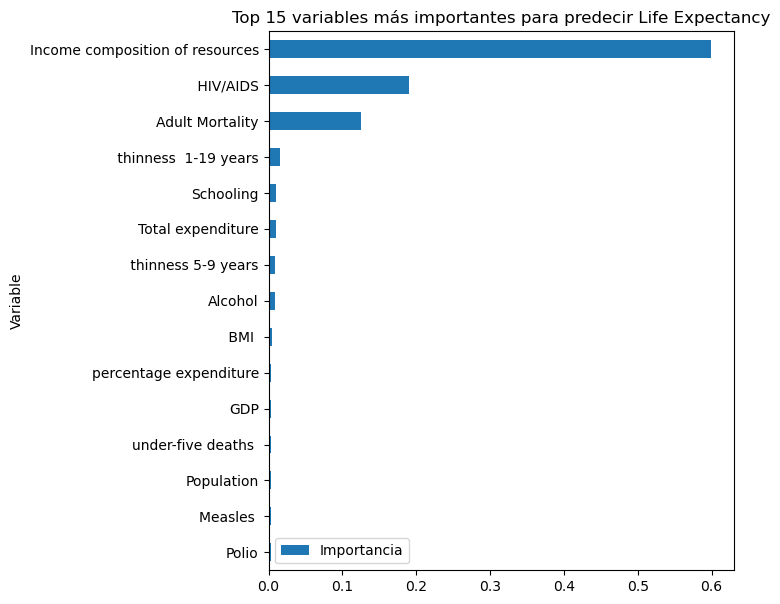

In [49]:
import matplotlib.pyplot as plt

vars_importancia.head(15).plot(kind='barh', x='Variable', y='Importancia', figsize=(6,7))
plt.title("Top 15 variables más importantes para predecir Life Expectancy")
plt.gca().invert_yaxis()
plt.show()

El modelo muestra que la esperanza de vida está determinada principalmente por factores estructurales y epidemiológicos. La variable con mayor impacto es income composition of resources, que por sí sola aporta más del 59% del poder predictivo debido a su fuerte relación con el desarrollo humano, el acceso a servicios, la educación y la calidad de vida. Le siguen HIV/AIDS y adult mortality, cuyos altos valores reducen drásticamente la esperanza de vida al reflejar enfermedades graves y fallas en los sistemas de salud. Otros factores relevantes son los indicadores de desnutrición infantil como thinness 1–19 years y thinness 5–9 years, así como la escolaridad y el gasto total en salud, que influyen en la salud de la población a largo plazo. Variables como alcohol, BMI, porcentaje del gasto, PIB y muertes menores de cinco años aportan señales útiles pero menos determinantes, en parte porque están correlacionadas con los factores principales. Finalmente, población, sarampión y polio son las menos importantes porque no diferencian significativamente entre países o su efecto ya está capturado por predictores más influyentes. En conjunto, el modelo revela que la esperanza de vida depende más del desarrollo socioeconómico, la carga de enfermedades críticas y el estado nutricional infantil que de variables demográficas simples.

### Interpretación



## XGBoost

In [51]:
xgb = XGBRegressor(
    random_state=RANDOM_SEED,
    objective="reg:squarederror",
    n_jobs=-1
)

In [52]:
param_xgb = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 1.0],
    "colsample_bytree": [0.7, 1.0]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_xgb,
    n_iter=10,
    cv=kfold,
    scoring="neg_mean_squared_error",
    random_state=RANDOM_SEED,
    n_jobs=-1
)

xgb_search.fit(X, y)
best_xgb = xgb_search.best_estimator_

In [53]:
print("\nMejores hiperparámetros - XGBoost:")
print(xgb_search.best_params_)


Mejores hiperparámetros - XGBoost:
{'subsample': 0.7, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.7}


In [54]:
xgb_cv_scores = cross_val_score(
    best_xgb, X, y,
    cv=kfold,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

xgb_rmse = np.sqrt(-xgb_cv_scores)

In [55]:
print(f"\nXGBoost - RMSE por fold: {xgb_rmse}")
print(f"XGBoost - RMSE medio: {xgb_rmse.mean()}")
print(f"XGBoost - RMSE desviación estándar: {xgb_rmse.std()}")


XGBoost - RMSE por fold: [1.97456579 2.13666207 1.67730358 1.7446361  1.81156369]
XGBoost - RMSE medio: 1.8689462476350047
XGBoost - RMSE desviación estándar: 0.1663129161767176


### Interpretación



In [56]:
resultados_cv = pd.DataFrame({
    "Modelo": ["Random Forest", "XGBoost"],
    "RMSE_medio": [rf_rmse.mean(), xgb_rmse.mean()],
    "RMSE_desv_std": [rf_rmse.std(), xgb_rmse.std()]
})

print("\nResumen comparación modelos (k-fold CV):")
print(resultados_cv)


Resumen comparación modelos (k-fold CV):
          Modelo  RMSE_medio  RMSE_desv_std
0  Random Forest    1.848079       0.152165
1        XGBoost    1.868946       0.166313
